<strong><font size="5">End To End Machine Learning pipeline with Feature selection and Hyperparameter tuning</font></strong>


    
<font size="3">Instructions:</font>    


Pipeline takes following parameters:


1)<b>label_name</b>:str Complusory
 

<strong>------------------------------------------------------------------------------------------------</strong>
 
2)<b>algo</b>:str

Algorithm to use to train models.(Current available options 1.Random Forest;2.Logistic Regression)


<strong>-----------------------------------------------------------------------------------------------------</strong>


3)<b>scoring</b> :str 
  
metric to maximize


<strong>----------------------------------------------------------------------------------------------------</strong>


4)<b>categorical_cols</b>:List(str) default:[]
  
List of Columns to convert to Ordinal values


<strong>-----------------------------------------------------------------------------------------------------</strong>



5)<b>want_preprocess</b>:bool default:True
 
Whether to avail preprocessing provided by the pipeline


<strong>----------------------------------------------------------------------------------------------------</strong>



6)<b>first iter</b>:bool default:False

Train base models

<strong><font size="2">Note</font>:Only set true while running code for first time or using a previously unused 
    
algorithm(set by algo parameter) and scoring for the first time.</strong>
<break>
<break>
<break>

<strong>---------------------------------------------------------------------------------------------------------</strong>    
    
7)<b>want_train</b>:bool default:False

train models on transformed dataset

<strong><font size="2">Note</font>:Setting this to true will trains models and stores them in your current directory</strong>

Can access the estimator trained on best features through the varialbe self.best_estimator

    
    
<strong>---------------------------------------------------------------------------------------------------------</strong>


8)<b>recheck</b>:bool default:False
<p>
recompute best features

<strong><font size="2">Note</font>:Setting this to true will trains models and stores them in your current directory</strong>
</p> 
    

In [48]:
import import_ipynb
from Full_Pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
ordi_cols=['gender','ever_married','Residence_type', 'smoking_status']
selector=Pipeline('stroke',algo='Random_Forest',scoring='roc_auc',categorical_cols=ordi_cols)
trainingdata,traininglabel=selector.fit_transform('stroke2.csv')
# print(boardgamestrain)

F:\Anaconda\envs\tensor 2\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


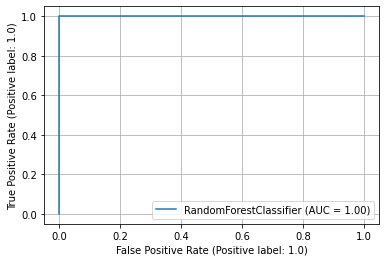

In [51]:

selector.predict_and_plot('plot_roc_curve',trainingdata,traininglabel,selector.best_estimator)
plt.show()

In [41]:
selector.predict_and_plot('predictions',trainingdata,traininglabel,selector.best_estimator)

array([1., 0., 0., ..., 1., 1., 0.])

In [42]:
selector.predict_and_plot('accuracy_score',trainingdata,traininglabel,selector.best_estimator)

1.0

In [43]:
selector.predict_and_plot('precision_score',trainingdata,traininglabel,selector.best_estimator)

1.0

In [44]:
selector.predict_and_plot('recall_score',trainingdata,traininglabel,selector.best_estimator)

1.0

In [45]:
selector.predict_and_plot('roc_auc_score',trainingdata,traininglabel,selector.best_estimator)

1.0

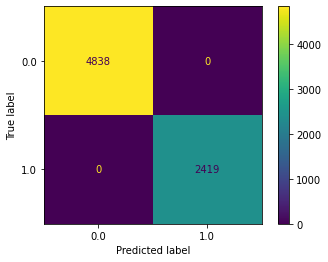

In [46]:
selector.predict_and_plot('confusion_matrix',trainingdata,traininglabel,selector.best_estimator)